# Outliers

In [25]:
from sklearn.datasets import load_boston
# house-prices dataset download
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


c:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(339, 13)
(167, 13)


In [11]:
for i in range(X_train.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [15]:
X_train[0] # Primeira linha do df

array([8.3710125e+00, 0.0000000e+00, 1.8100000e+01, 0.0000000e+00,
       6.1400000e-01, 6.1850000e+00, 9.6700000e+01, 2.1705000e+00,
       2.4000000e+01, 6.6600000e+02, 2.0200000e+01, 3.7970000e+02,
       1.8030000e+01])

In [27]:
import pandas as pd

df_train = pd.DataFrame(X_train, 
                  columns=["feature " + str(i) for i in range(X_train.shape[1])])
df_train.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12
0,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
1,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
2,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
3,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
4,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27


In [28]:
df_train_with_outlier = df_train.copy()

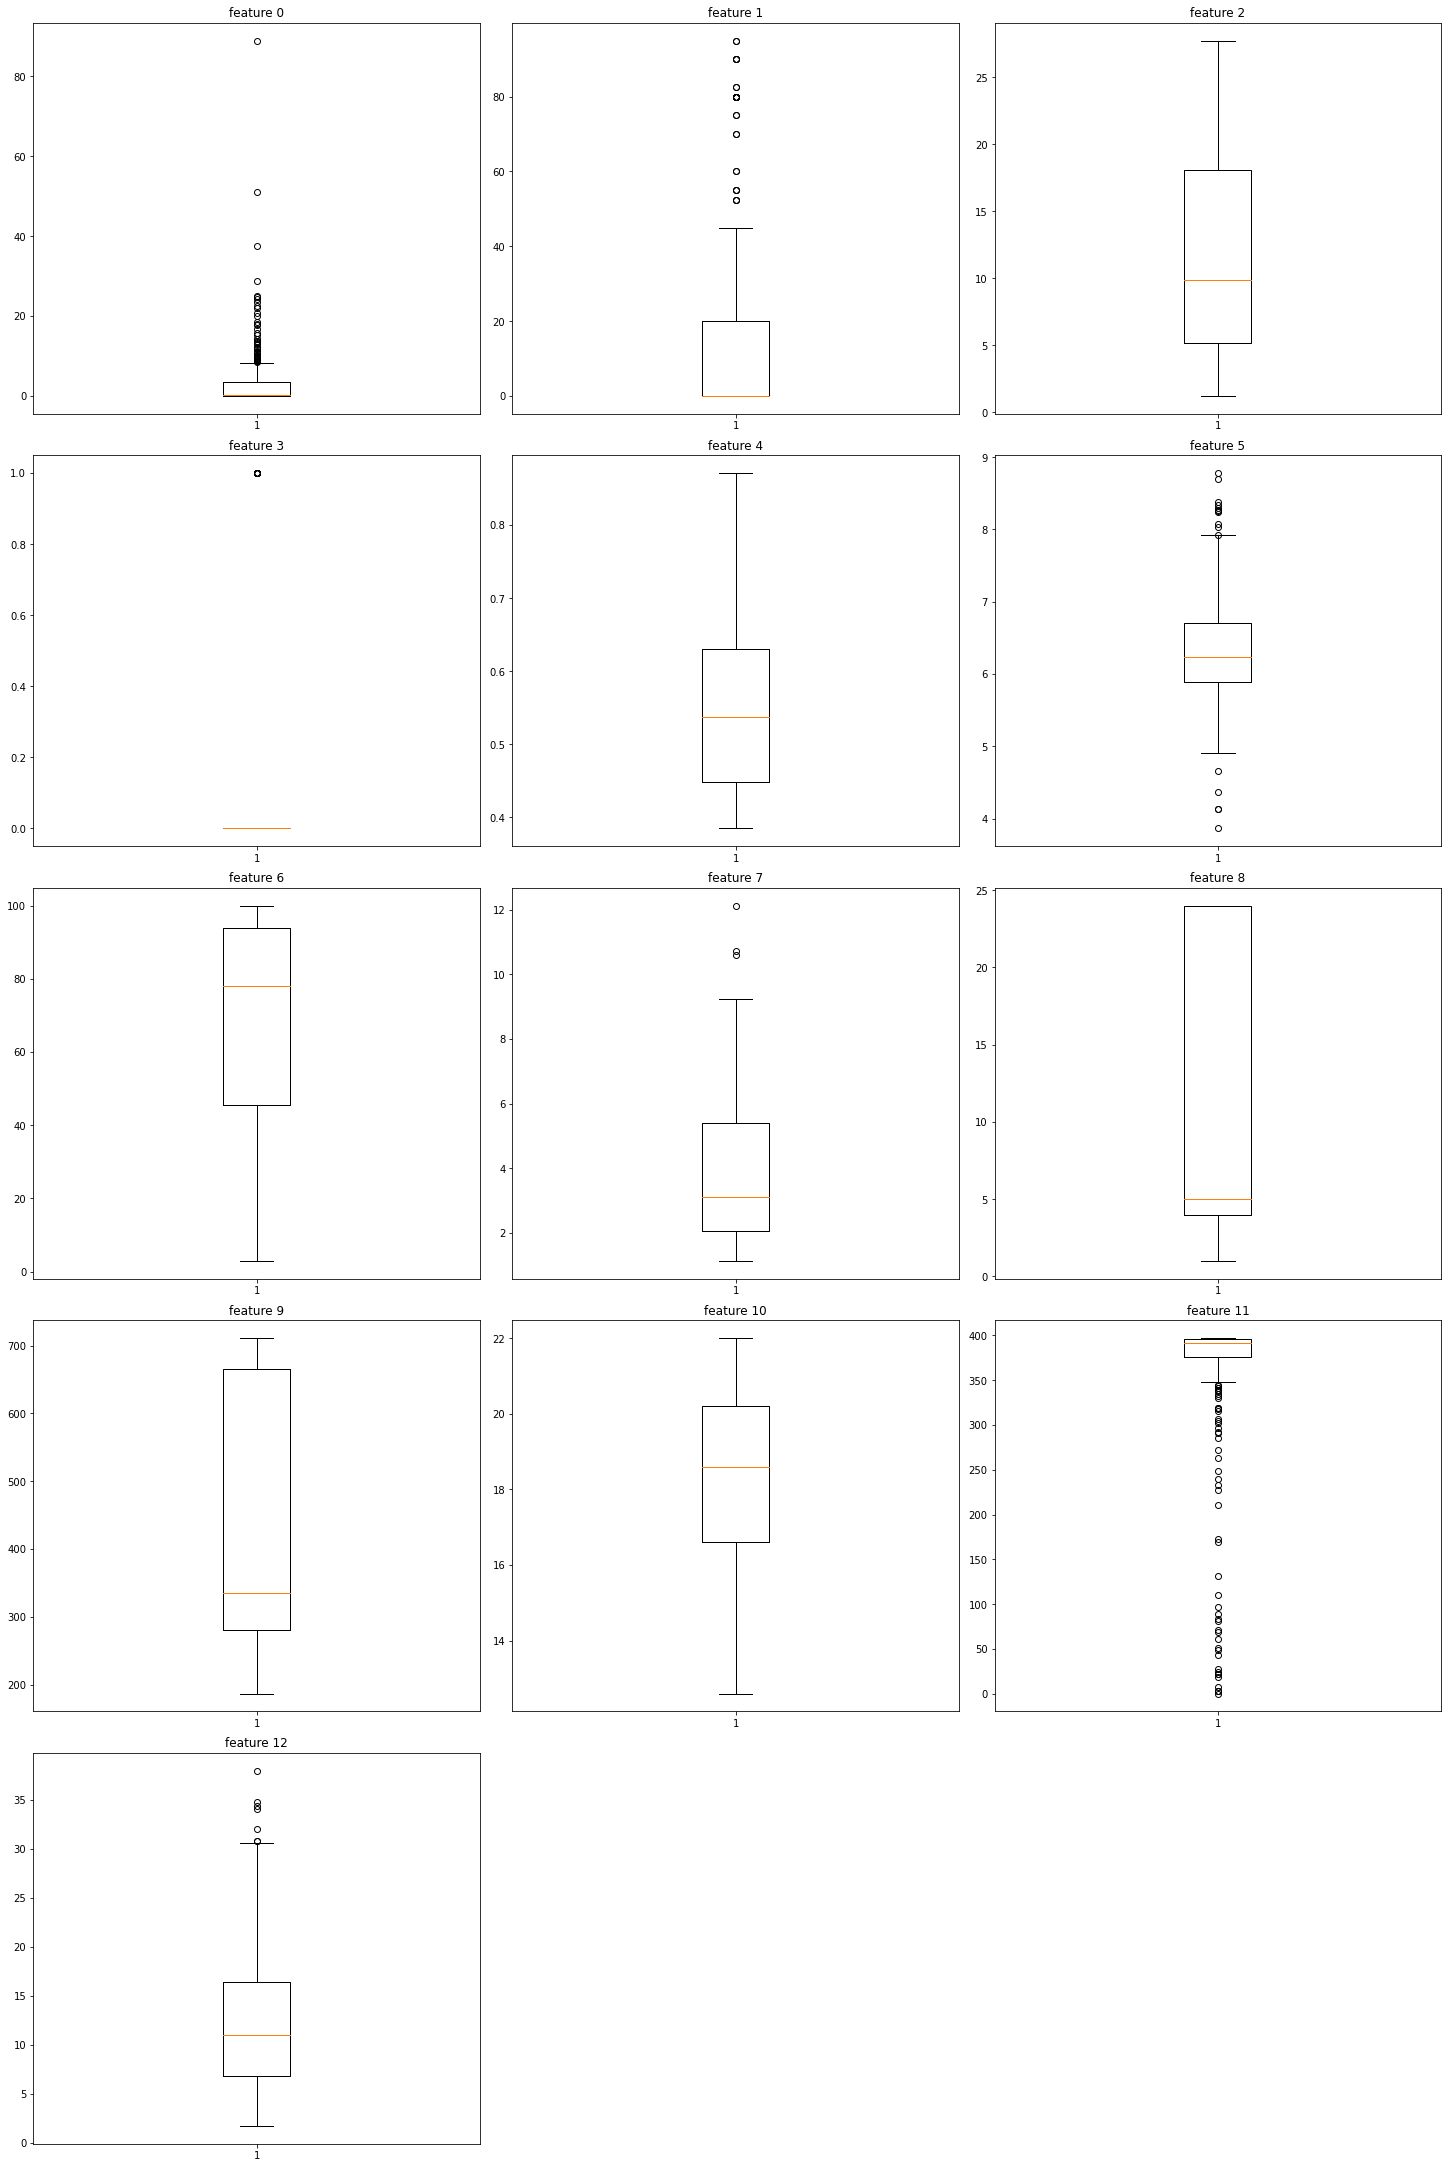

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def draw_boxplots(df, selected_features):
  n = len(selected_features)
  fig = plt.figure(constrained_layout=True, figsize=(20, 30))
  gs = gridspec.GridSpec(int(n/3) + 1, 3, figure=fig)
  for i in range(n):
    k = int(i / 3)
    j = i % 3
    col = selected_features[i]
    ax = fig.add_subplot(gs[k, j])
    ax.set_title(col)
    ax.boxplot(df[col])

draw_boxplots(df_train, df_train.columns)

In [73]:
df_train['feature 12'].quantile(0.25)

6.880000000000001

In [74]:
df_train.loc[:,'feature 12'].quantile(0.25)

6.880000000000001

In [70]:
df_train.columns

Index(['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4',
       'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9',
       'feature 10', 'feature 11', 'feature 12'],
      dtype='object')

In [75]:
def replace_outliers(df, var_names):
  for var_name in var_names:
    # calculating Q1 and Q3
    Q1 = df[var_name].quantile(0.25)
    Q3 = df[var_name].quantile(0.75)
    # calculating Interquartile IQR
    IQR = Q3 - Q1
    # build up filter
    filter_up = (df.loc[:,var_name] > Q3 + 1.5 *IQR)
    # apply up filter on df
    df.loc[filter_up, var_name] = Q3 + 1.5 *IQR
    # build down filter
    filter_down = (df.loc[:,var_name] < Q1 - 1.5 * IQR)
    # apply down filter on df
    df.loc[filter_down, var_name] = Q1 - 1.5 * IQR

In [80]:
df_train.shape # Ele não removeu os outliers, só substituiu pelo valor maior e menor

(339, 13)

In [81]:
df_train_with_outlier.shape

(339, 13)

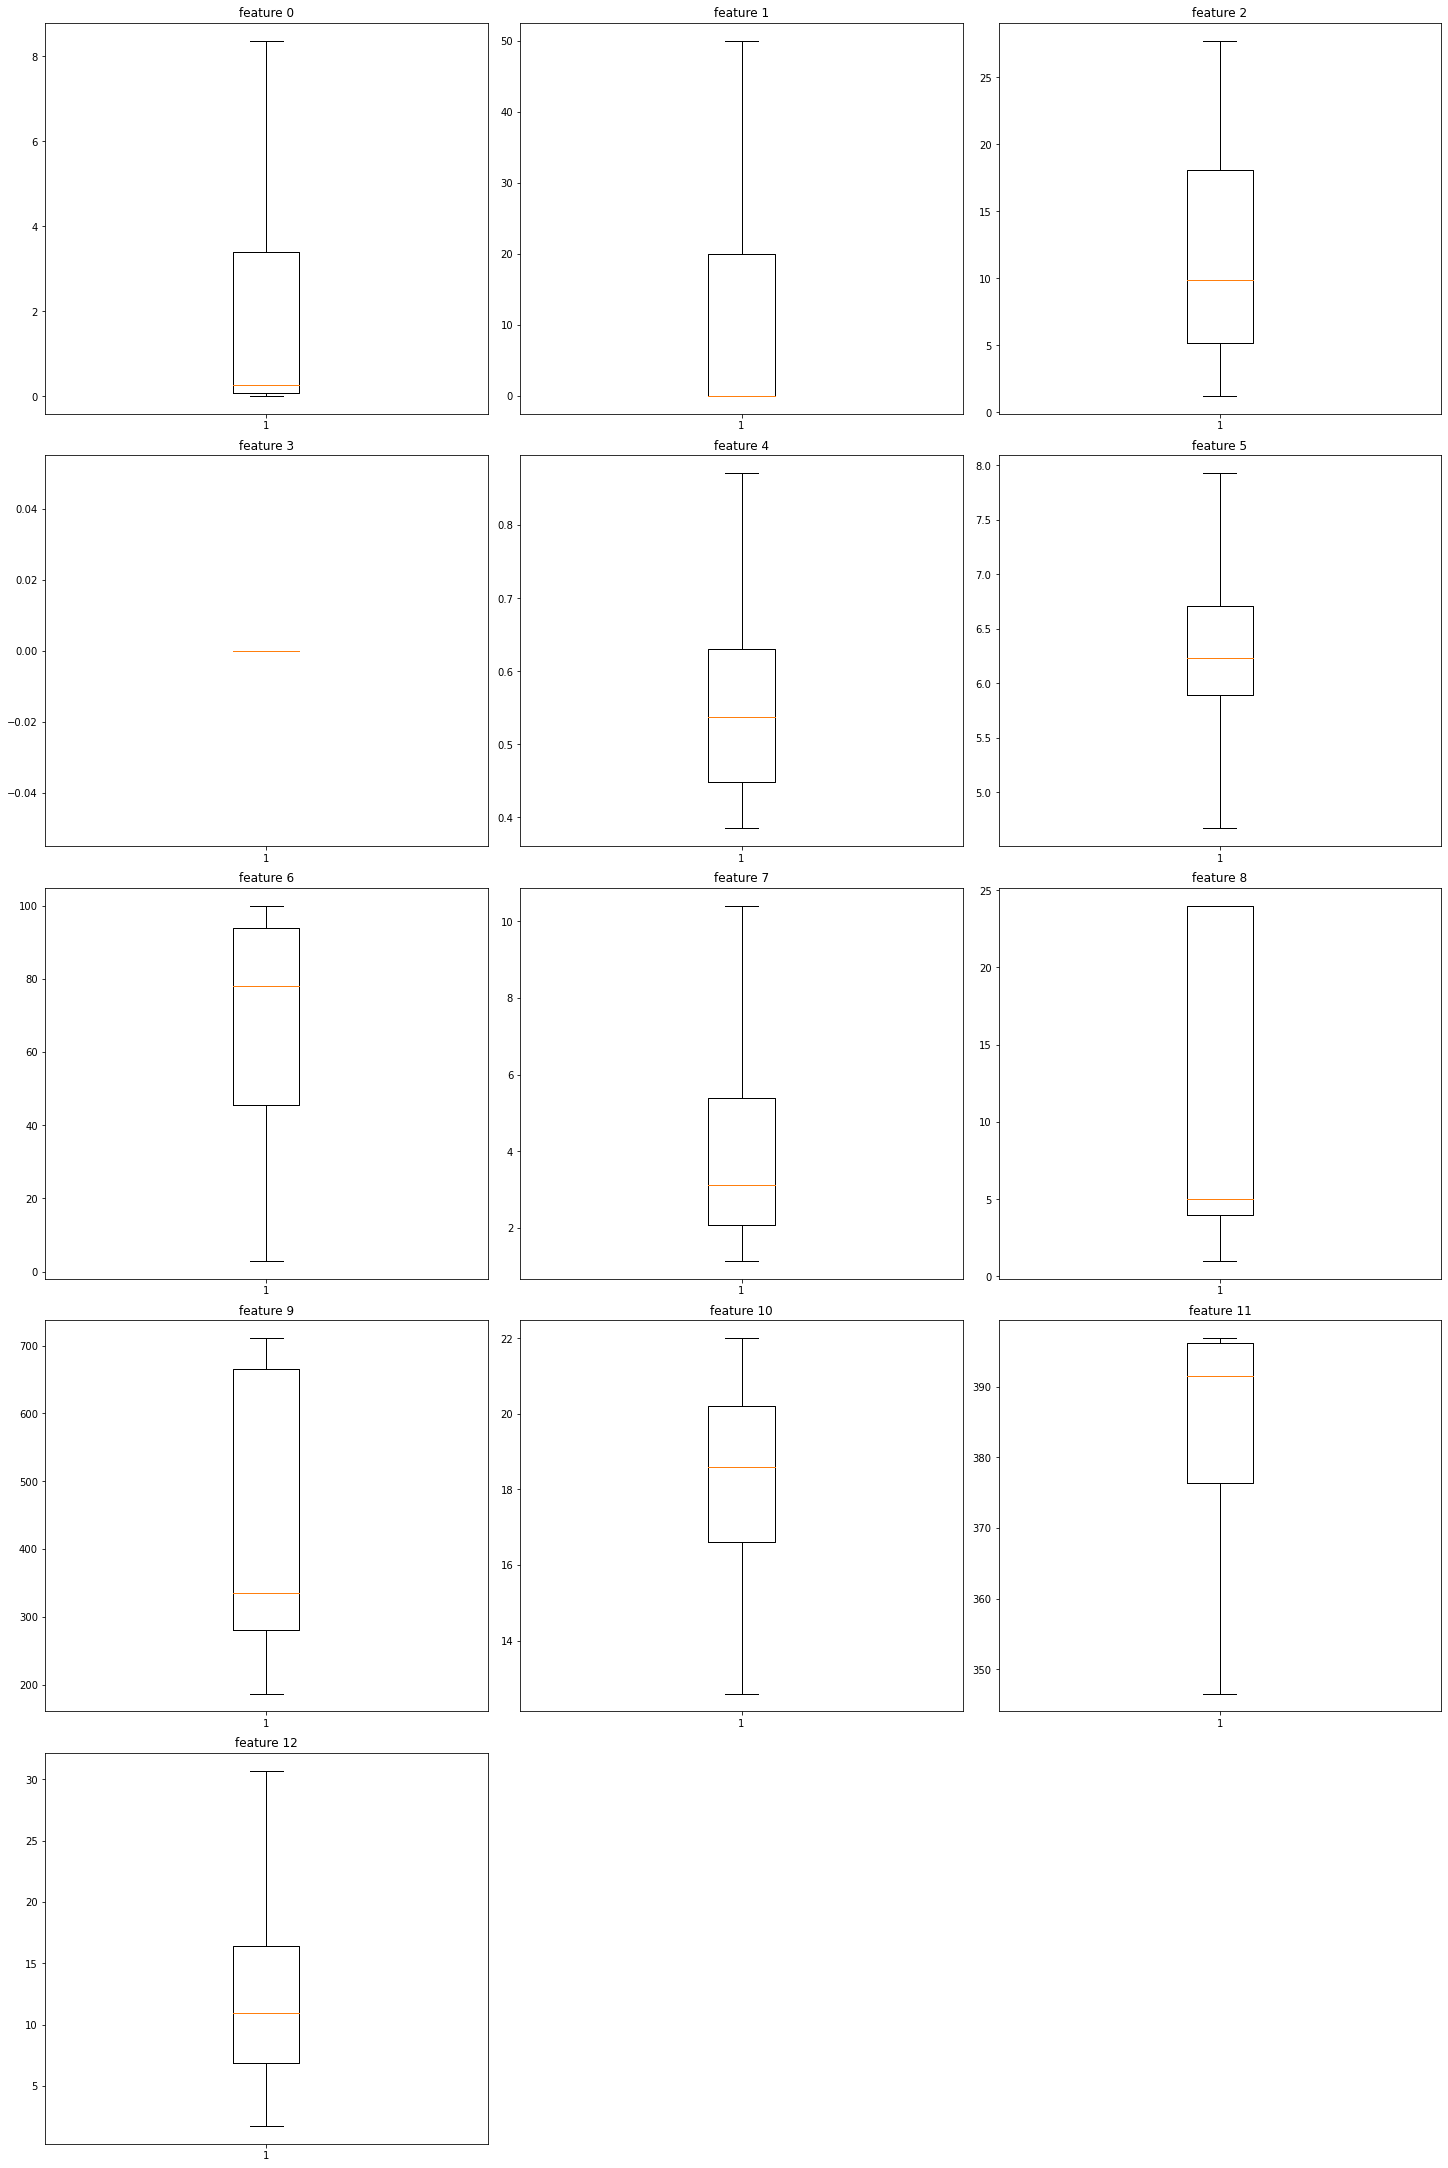

In [76]:
replace_outliers(df_train, df_train.columns)
draw_boxplots(df_train, df_train.columns)

A partir de 10 arvores ja, o *MSE* fica fluctuando entre 2.3 e 4.0.  
Podemos ficar com o hiperparametro `n_estimators` igual a **10** para otimizar a velocidade do treinamento e da prediçao do modelo.